In [339]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [340]:
df = pd.read_csv('dataImages.csv', sep=',')

In [341]:
df.columns

Index(['Unnamed: 0', 'NameImage', 'label', 'bbox-0', 'bbox-1', 'bbox-2',
       'bbox-3', 'AOL', 'POL', 'COL', 'EGS', 'ECC', 'PESOVIVO', 'PESOABATE',
       'RC', 'FAMACHA', 'CC', 'AG', 'AC', 'AP', 'CT', 'CP', 'Profund'],
      dtype='object')

In [342]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('NameImage', axis=1)
df = df.drop('PESOABATE', axis=1)
df = df.drop('RC', axis=1)
df = df.drop('CP', axis=1)
# df = df.drop('AOL', axis=1)
df = df.drop('POL', axis=1)
df = df.drop('COL', axis=1)
df = df.drop('EGS', axis=1)
df = df.drop('ECC', axis=1)
df = df.drop('FAMACHA', axis=1)
df = df.drop('CC', axis=1)
df = df.drop('AG', axis=1)
df = df.drop('AC', axis=1)
df = df.drop('AP', axis=1)
df = df.drop('CT', axis=1)
df = df.drop('PESOVIVO', axis=1)
df = df.drop('Profund', axis=1)

df

,label,bbox-0,bbox-1,bbox-2,bbox-3,AOL
0,255,490,950,904,1563,"7,92"
1,255,485,736,866,1312,"6,49"
2,255,513,577,1063,1318,"7,32"
3,255,387,643,812,1137,"7,27"
4,255,425,572,907,1183,"8,12"
5,255,438,1052,1043,1745,"10,13"
6,255,447,261,826,850,"7,83"
7,255,433,784,948,1412,"9,56"
8,255,500,539,927,1168,"8,5"
9,255,501,1017,936,1654,"6,62"


In [343]:
# Tratar os floats que foram inseridos com virgula ao inves de ponto.

def replaceFloat(nameColumns):
    aux = [float(str(x).replace(',', '.')) for x in df[nameColumns]]
    return aux

for x in df:
    df[x] = replaceFloat(x)

df

,label,bbox-0,bbox-1,bbox-2,bbox-3,AOL
0,255.0,490.0,950.0,904.0,1563.0,7.92
1,255.0,485.0,736.0,866.0,1312.0,6.49
2,255.0,513.0,577.0,1063.0,1318.0,7.32
3,255.0,387.0,643.0,812.0,1137.0,7.27
4,255.0,425.0,572.0,907.0,1183.0,8.12
5,255.0,438.0,1052.0,1043.0,1745.0,10.13
6,255.0,447.0,261.0,826.0,850.0,7.83
7,255.0,433.0,784.0,948.0,1412.0,9.56
8,255.0,500.0,539.0,927.0,1168.0,8.50
9,255.0,501.0,1017.0,936.0,1654.0,6.62


### Ver os valores null

<AxesSubplot:>

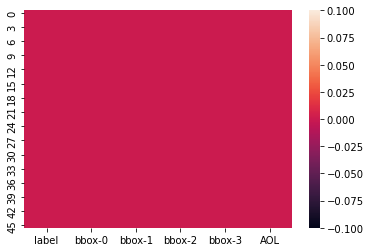

In [344]:
sns.heatmap(df.isnull())

In [345]:
df.isnull().sum() #check for missing values

label     0
bbox-0    0
bbox-1    0
bbox-2    0
bbox-3    0
AOL       0
dtype: int64

### Treinando o modelo

In [346]:
X = df.drop('AOL', axis=1)
y = df['AOL']

In [347]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [348]:
# Fit the model
model = LinearRegression()
model = model.fit(X_train, y_train)

In [349]:
importance = model.coef_

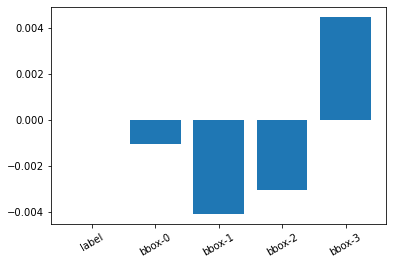

In [350]:
#histogram
plt.bar([x for x in range (len(importance))], importance)
plt.xticks([x for x in range (len(importance))], X.columns.values.tolist(), rotation=30)
plt.show()

In [351]:
y_test_predict = model.predict(X_test)

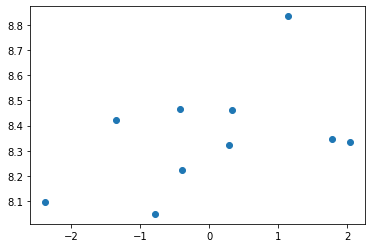

In [352]:
plt.scatter(y_test-y_test_predict,y_test_predict)
plt.show()

### Result

In [353]:
# model evaluation for training set
y_train_predict = model.predict(X_train)

rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2_train = r2_score(y_train, y_train_predict)

print(f"RMSE for training is {rmse_train}")
print(f"R2 score for training is {r2_train}")

RMSE for training is 1.2381500583706662
R2 score for training is 0.08665826096358142


In [354]:
# model evaluation for training set
y_test_predict = model.predict(X_test)

rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_test = r2_score(y_test, y_test_predict)

print(f"RMSE for testing is {rmse_test}")
print(f"R2 score for testing is {r2_test}")

RMSE for testing is 1.3093925386136203
R2 score for testing is 0.1484661940200629


In [355]:
print(model.intercept_)

8.454865165857852


In [356]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
label,0.000000
bbox-0,-0.001034
bbox-1,-0.004107
bbox-2,-0.003050
bbox-3,0.004497


In [357]:
y_pred = model.predict(X_test)

In [358]:
df_aux = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_aux

,Actual,Predicted
29,8.04,8.464102
32,5.73,8.097882
45,10.37,8.335874
39,8.79,8.460903
6,7.83,8.223177
5,10.13,8.346634
30,9.97,8.833812
3,7.27,8.049716
31,7.08,8.420639
10,8.61,8.325026


In [359]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.0873267234099726
Mean Squared Error: 1.714508820177021
Root Mean Squared Error: 1.3093925386136203
